## Logistic regression  in Theano

### Contents

1. [hello world](#hello_world)
2. [Loading and preprocessing data](#data)
3. **Logistic Regression** trained using different optimization methods
    * [Gradient Descent](#full)
    * [Minibatch Stochastic Gradient Descent (SGD)](#minibatch_sgd)
    * [SGD with momentum](#momentum_sgd)
    * [SGD with Nesterov's method](#nesterov_sgd)
4. [Visualizing weights](#viz)

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

import theano
import theano.tensor as T

%run ../../src/fetch_mnist.py
%run ../../src/theano/logistic_regression.py
%run ../../src/theano/plotting_utils.py

<a id='hello_world'></a>

### 'hello world' in Theano

In [2]:
# x is input placeholder
x = T.dmatrix('x')
# symbolic expression for logistic function
s = 1 / (1 + T.exp(-x))
# register s as a function of x
logistic = theano.function([x], s)

# call function (substitute value of x_input for x)
x_input = [[0, 1], [-1, -2]]
logistic(x_input)

array([[ 0.5       ,  0.73105858],
       [ 0.26894142,  0.11920292]])

### The model 

The model uses regularization with $l_1$ and $l_2$ penalty, and is trained with gradient descent.

<a id='data'></a>

## Training on MNIST 

In [3]:
X_train, X_test, y_train, y_test = preprocessed_mnist(random_state=0)

plotter = Plotter(X_test, y_test)

/opt/anaconda3/envs/nnets/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


<a id='full'></a>

## Logistic regression with gradient descent

In [4]:
lreg = LogisticRegression(
  n_iter=250,
  batch_size=None,
  lmbda=0.0001,
  l1_ratio=0.5,
  learning_rate=0.25)

In [5]:
%time lreg.fit(X_train, y_train)

CPU times: user 1min 48s, sys: 588 ms, total: 1min 48s
Wall time: 56.5 s


Final loss: 0.2848


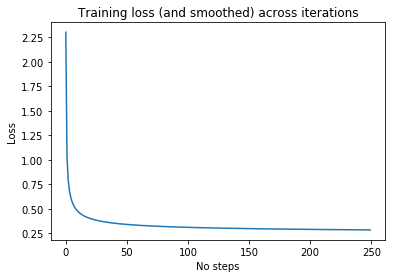

accuracy: 0.9186
             precision    recall  f1-score   support

          0       0.95      0.97      0.96      1381
          1       0.93      0.97      0.95      1575
          2       0.92      0.89      0.91      1398
          3       0.91      0.89      0.90      1428
          4       0.91      0.93      0.92      1365
          5       0.90      0.87      0.89      1263
          6       0.93      0.96      0.94      1375
          7       0.94      0.93      0.93      1458
          8       0.89      0.85      0.87      1365
          9       0.90      0.90      0.90      1392

avg / total       0.92      0.92      0.92     14000



In [6]:
plotter.plot_loss_and_accuracy(lreg, add_smoothing=False)

<a id='minibatch_sgd'></a>

## Logistic regression with Stochastic Gradient Descent

In [7]:
sgd_lreg = LogisticRegression(
  n_iter=250,
  batch_size=1000,
  lmbda=0.0001,
  l1_ratio=0.5,
  learning_rate=0.25)

%time sgd_lreg.fit(X_train, y_train)

CPU times: user 4.12 s, sys: 64 ms, total: 4.19 s
Wall time: 2.21 s


Final loss: 0.2920
Final loss, smoothed: 0.2878


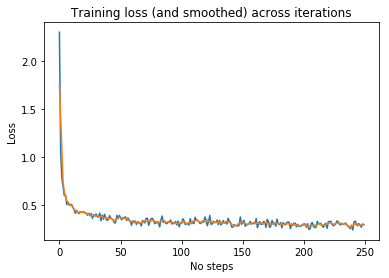

accuracy: 0.9177
             precision    recall  f1-score   support

          0       0.95      0.97      0.96      1381
          1       0.92      0.97      0.95      1575
          2       0.93      0.90      0.91      1398
          3       0.91      0.88      0.90      1428
          4       0.91      0.93      0.92      1365
          5       0.90      0.87      0.89      1263
          6       0.93      0.96      0.94      1375
          7       0.94      0.93      0.93      1458
          8       0.90      0.85      0.88      1365
          9       0.89      0.90      0.90      1392

avg / total       0.92      0.92      0.92     14000



In [8]:
plotter.plot_loss_and_accuracy(sgd_lreg)

<a id='momentum_sgd'></a>

## Logistic regression with SGD and momentum

Momentum update rule consists of adding one parameter which 'remembers' last velocity $v$ (when we add it to weights, $\mu v$ corresponds to direction of last change).

The updates become

$v_{t+1} = \mu v_t - \epsilon \nabla f(w_t)$

$w_{t+1} = w_t + v_{t+1}$

For more details you can for example see [Why Momentum Really Works](https://distill.pub/2017/momentum/)

Note learning rate is 10x lower and we use 2x less iterations.

In [9]:
sgd_momentum_lreg = LogisticRegression(
  n_iter=125,
  batch_size=1000,
  lmbda=0.0001,
  l1_ratio=0.5,
  learning_rate=0.05,
  momentum={
    'method': 'momentum',
    'decay': 0.9})

%time sgd_momentum_lreg.fit(X_train, y_train)

CPU times: user 2.44 s, sys: 40 ms, total: 2.48 s
Wall time: 1.43 s


Final loss: 0.2823
Final loss, smoothed: 0.3169


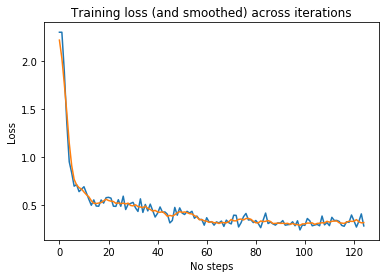

accuracy: 0.9165
             precision    recall  f1-score   support

          0       0.95      0.96      0.96      1381
          1       0.94      0.97      0.95      1575
          2       0.91      0.90      0.91      1398
          3       0.91      0.89      0.90      1428
          4       0.90      0.93      0.92      1365
          5       0.89      0.87      0.88      1263
          6       0.93      0.95      0.94      1375
          7       0.93      0.93      0.93      1458
          8       0.89      0.85      0.87      1365
          9       0.90      0.89      0.89      1392

avg / total       0.92      0.92      0.92     14000



In [10]:
plotter.plot_loss_and_accuracy(sgd_momentum_lreg)

<a id='nesterov_sgd'></a>

## Logistic regression with SGD and Nesterov's method 

Nesterov's method is modified form of momentum method that evaluates gradient at $w_t + \mu v_t$ (performing lookahead based on previous velocity).

The update for velocity becomes

$v_{t+1} = \mu v_t - \epsilon \nabla f(w_t + \mu v_t)$

CPU times: user 2.38 s, sys: 8 ms, total: 2.38 s
Wall time: 1.42 s
Final loss: 0.2823
Final loss, smoothed: 0.3169


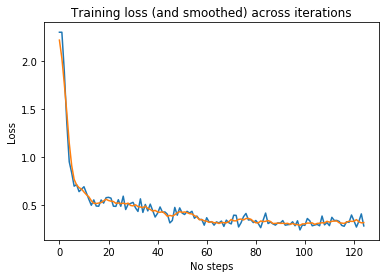

accuracy: 0.9165
             precision    recall  f1-score   support

          0       0.95      0.96      0.96      1381
          1       0.94      0.97      0.95      1575
          2       0.91      0.90      0.91      1398
          3       0.91      0.89      0.90      1428
          4       0.90      0.93      0.92      1365
          5       0.89      0.87      0.88      1263
          6       0.93      0.95      0.94      1375
          7       0.93      0.93      0.93      1458
          8       0.89      0.85      0.87      1365
          9       0.90      0.89      0.89      1392

avg / total       0.92      0.92      0.92     14000



In [12]:
sgd_nag_lreg = LogisticRegression(
  n_iter=125,
  batch_size=1000,
  lmbda=0.0001,
  l1_ratio=0.5,
  learning_rate=0.05,
  momentum={
    'method': 'nesterov',
    'decay': 0.9})

%time sgd_nag_lreg.fit(X_train, y_train)

plotter.plot_loss_and_accuracy(sgd_nag_lreg)

<a id='viz'></a>

## Visualizing weights

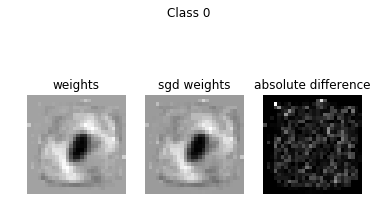

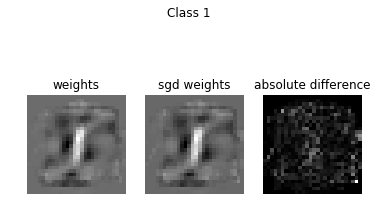

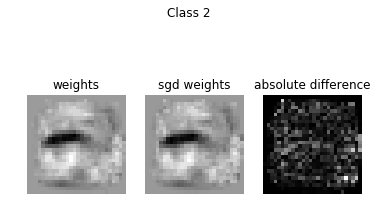

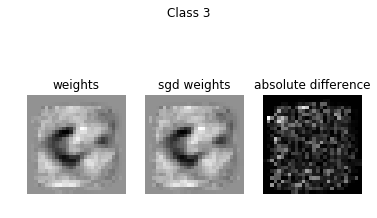

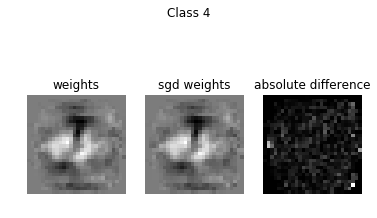

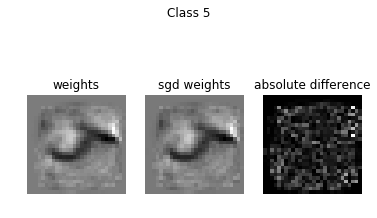

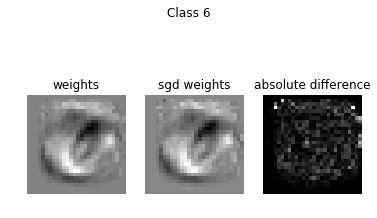

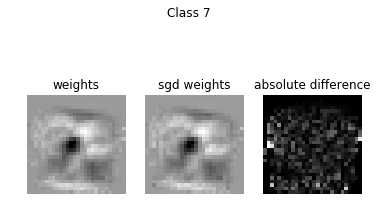

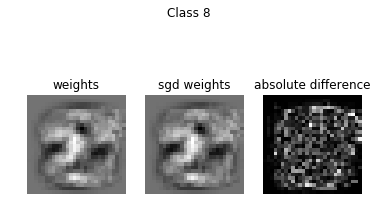

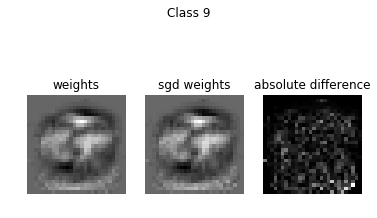

In [13]:
for i in range(10):
  digit_weights = lreg.thW.get_value().T[i, :].reshape(28, 28)
  sgd_digit_weights = sgd_lreg.thW.get_value().T[i, :].reshape(28, 28)
  f, ((ax1, ax2, ax3)) = plt.subplots(1, 3)
  f.suptitle('Class {}'.format(i)) 
  
  
  ax1.imshow(digit_weights , cmap='gray')
  ax1.set_title('weights')
  ax1.axis('off') 
  
  ax2.imshow(sgd_digit_weights, cmap='gray')
  ax2.set_title('sgd weights')
  ax2.axis('off') 
  
  ax3.imshow(abs(digit_weights - sgd_digit_weights), cmap='gray')
  ax3.set_title('absolute difference'.format(str(i)))
  ax3.axis('off') 
  plt.show()